In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
%%time

dtypes = {'id': 'int32',
          'store_nbr': 'int8',
          'item_nbr': 'int32',
          'class': 'int16',
          'perishable': 'bool',
          'cluster': 'int8',
          'earthquake': 'bool',
          'year': 'int16',
          'month': 'int8',
          'day': 'int8'}

df_origin = pd.read_csv('./data/train_store_1.csv', low_memory=True, dtype=dtypes)

CPU times: user 3.77 s, sys: 273 ms, total: 4.05 s
Wall time: 4.05 s


In [4]:
#df['item_nbr'].value_counts()

311994     1226
1083152    1226
364606     1226
464374     1226
314384     1226
582863     1226
305229     1226
502331     1226
582865     1225
841197     1225
305080     1224
699703     1224
838216     1224
582864     1224
211203     1223
838215     1223
1047685    1222
1047679    1222
1146496    1221
1037845    1221
1162382    1221
843585     1221
105575     1221
507478     1221
557256     1220
1146795    1219
360314     1219
1047680    1219
457424     1219
273528     1219
           ... 
1150700       6
1239879       5
2008567       5
1717640       5
1695872       5
583927        5
1986680       5
2011898       4
1689929       4
2052563       4
1909748       4
2049003       4
2123468       3
2123775       3
1660186       3
2075374       3
2122676       3
1954748       3
2123727       3
413557        3
2062912       3
354971        2
315473        2
1005464       2
1489869       2
1005461       1
155499        1
661582        1
2127114       1
906980        1
Name: item_nbr, Length: 

## Preprocessing

In [5]:
# Choose some items to reduce dataset size
df_use = pd.DataFrame()

use_list = [311994, 1083152, 364606, 464374, 314384, 582863, 305229, 502331, 582865, 841197, 305080, 699703, 838216, 582864,
211203, 838215]

for i in use_list:
    df_use = df_use.append(df_origin[df_origin.item_nbr == i])
            
df_use.shape

(19600, 22)

In [6]:
df = df_use.copy()

In [7]:
%%time
#Get-dummies
dummy_variables = ['store_nbr', 'item_nbr', 'onpromotion', 'family', 'class', 'perishable', 
                    'city', 'state','type_store', 'cluster', 'earthquake', 'type_holiday', 
                    'description_n', 'description_r','description_l', 'year', 'month', 'day', 'week_day']

for var in dummy_variables:
    dummy = pd.get_dummies(df[var], drop_first = False)
    df = pd.concat([df, dummy], axis = 1)

df = df.drop(dummy_variables, axis = 1)

print('Shape :', df.shape)

Shape : (19600, 126)
CPU times: user 142 ms, sys: 11.6 ms, total: 153 ms
Wall time: 152 ms


In [9]:
%%time
# Normalize Series data
#Reference: https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/

scalable_variables = ['dcoilwtico', 'unit_sales']

for var in scalable_variables:
    mini, maxi = df[var].min(), df[var].max()
    df.loc[:,var] = (df[var] - mini) / (maxi - mini)

CPU times: user 175 ms, sys: 65 ms, total: 240 ms
Wall time: 225 ms


In [11]:
%%time
#Split labels from train
df = df.reset_index(drop=True)
x_label = df['unit_sales']
X_train = df.drop(['id', 'unit_sales'], axis=1)

CPU times: user 6.19 ms, sys: 3.15 ms, total: 9.34 ms
Wall time: 7.48 ms


In [12]:
X_train.shape

(19600, 124)

In [13]:
x_label.shape

(19600,)

In [14]:
%%time
from sklearn.model_selection import train_test_split
#Split datasets for Cross-Validation
num_test = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, x_label, test_size=num_test, random_state=10)
print('X_train shape :', X_train.shape)
print('Y_train shape :', y_train.shape)
print('x_validation shape :', X_val.shape)
print('y_validation shape :', y_val.shape)

X_train shape : (15680, 124)
Y_train shape : (15680,)
x_validation shape : (3920, 124)
y_validation shape : (3920,)
CPU times: user 243 ms, sys: 89.5 ms, total: 332 ms
Wall time: 528 ms


In [12]:
X_train

,dcoilwtico,1,96995,99197,103520,103665,105574,105575,105577,105693,...,29,30,31,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1252123,0.266756,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1057991,0.137139,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1706396,0.320205,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
216274,0.804244,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
582821,0.415362,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1060731,0.128180,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1249200,0.244007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1929448,0.270670,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1976424,0.206213,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1866119,0.279843,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [15]:
import keras

# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train.reshape(y_train.shape[0],1))
features_val= np.array(X_val)
targets_val = np.array(y_val.reshape(y_val.shape[0],1))

print(features[:10])
print(targets[:10])

Using TensorFlow backend.
/anaconda3/envs/keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


[[ 0.28060788  1.          0.         ...,  0.          0.          0.        ]
 [ 0.92074364  1.          0.         ...,  0.          0.          1.        ]
 [ 0.30124755  1.          0.         ...,  0.          1.          0.        ]
 ..., 
 [ 0.25587084  1.          0.         ...,  0.          0.          0.        ]
 [ 0.21183953  1.          0.         ...,  1.          0.          0.        ]
 [ 0.06678082  1.          0.         ...,  0.          0.          0.        ]]
[[ 0.23619236]
 [ 0.24893918]
 [ 0.25539321]
 [ 0.25176803]
 [ 0.23196605]
 [ 0.24243564]
 [ 0.23479491]
 [ 0.23620934]
 [ 0.2291372 ]
 [ 0.24752475]]


/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


## Modeling_Sequential

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# Building the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1250      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,371
Trainable params: 1,371
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_val, targets_val)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
# plot metrics
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

Step :  0 / 1000
15680/15680 [==============================] - 0s 20us/step
Training MSE: 0.000248312309642
3920/3920 [==============================] - 0s 19us/step
Validation MSE: 0.000341694965799 

Step :  250 / 1000
15680/15680 [==============================] - 0s 18us/step
Training MSE: 0.000227642426443
3920/3920 [==============================] - 0s 19us/step
Validation MSE: 0.000340214753773 

Step :  500 / 1000
15680/15680 [==============================] - 0s 18us/step
Training MSE: 0.000223823731632
3920/3920 [==============================] - 0s 19us/step
Validation MSE: 0.000346250403037 

Step :  750 / 1000
15680/15680 [==============================] - 0s 18us/step
Training MSE: 0.000211204438944
3920/3920 [==============================] - 0s 18us/step
Validation MSE: 0.000324253456659 



<Figure size 640x480 with 1 Axes>

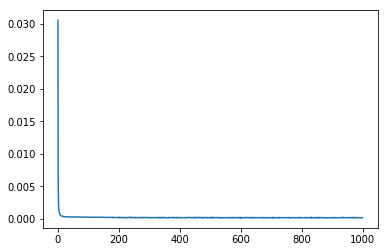

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

## Modeling_GRU

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import GRU

In [32]:
# Building a GRU model

#Reference: https://keras.io/layers/embeddings/
#Reference: https://keras.io/layers/recurrent/#gru
#Reference: https://stackoverflow.com/questions/38241134/input-shape-for-keras-lstm-gru-language-model
#Reference: https://www.programcreek.com/python/example/97114/keras.layers.recurrent.GRU

model = Sequential()
model.add(Embedding(20000, 124))
#model.add(Embedding(X_train.shape[0], X_train.shape[-1]))
model.add(GRU(X_train.shape[-1]))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 124)         2480000   
_________________________________________________________________
gru_5 (GRU)                  (None, 124)               92628     
_________________________________________________________________
dropout_4 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 125       
Total params: 2,572,753
Trainable params: 2,572,753
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Training the model
# Reference: https://keras.io/callbacks/
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs_tot = 1000
epochs_step = 100
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

EarlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath='./data/weights_GRU.hdf5', verbose=1, save_best_only=True)

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0, validation_data=(features_val, targets_val), callbacks=[checkpointer, EarlyStop])
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_val, targets_val)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)

Step :  0 / 1000
15680/15680 [==============================] - 10s 659us/step
Training MSE: 0.000416592045224
3920/3920 [==============================] - 3s 653us/step
Validation MSE: 0.000445534512211 

Step :  250 / 1000
15680/15680 [==============================] - 11s 677us/step
Training MSE: 0.000338031818861
3920/3920 [==============================] - 3s 680us/step
Validation MSE: 0.000366932627144 

Step :  500 / 1000
15680/15680 [==============================] - 10s 660us/step
Training MSE: 0.000399689157912
3920/3920 [==============================] - 3s 655us/step
Validation MSE: 0.000431112980539 

Step :  750 / 1000
15680/15680 [==============================] - 11s 694us/step
Training MSE: 0.000276144244329
3920/3920 [==============================] - 3s 701us/step
Validation MSE: 0.000320386495566 



## Modeling_Using Multi GPU

In [ ]:
# import tensorflow as tf
# from keras.utils import multi_gpu_model

#Reference: https://keras.io/utils/#multi_gpu_model

# num_gpus = 8

# with tf.device('/cpu:0'):
#     model = Sequential()
#     model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
#     model.add(Dropout(.2))
#     model.add(Dense(10, activation='relu'))
#     model.add(Dropout(.1))
#     model.add(Dense(1))


# parallel_model = multi_gpu_model(model, gpus=num_gpus)
# parallel_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# model.summary()  

In [ ]:
# epochs_tot = 1000
# epochs_step = 100
# epochs_ratio = int(epochs_tot / epochs_step)

# hist =np.array([])

# for i in range(epochs_ratio):
#     history = parallel_model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
#     # Evaluating the model on the training and testing set    
#     score_train = model.evaluate(features, targets)
#     print('Training MSE:', score_train[1])
#     score_val = model.evaluate(feature_val, targets_val)
#     print('Validation MSE:', score_val[1], '\n')
#     hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)

# # plot metrics
# import matplotlib.pyplot as plt
# plt.plot(hist)
# plt.show()

# # Save model 
# save_path = './hist/grocery_store1_tensor_1.h5'
# model.save(save_path)
# print('This model has saved at {}.'.format(save_path))
